In [1]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import sklearn 
from sklearn.preprocessing import PolynomialFeatures 

In [2]:
#1 importing our data
data = pd.read_csv("./kc_house_data.csv")


In [3]:
#1.1 displaying our data
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
#1.2 in this case there are 0 null values here so no bother to eleminate any nulls
if(data.isnull().sum().sum()==0):
    print("our data is ready")
else:
    print("there are null values in here")

our data is ready


In [5]:
#1.3 using describe function 
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '33')])

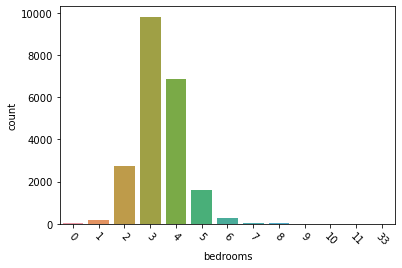

In [6]:
#1.5 here we display the frequency of houses based of the number of bedrooms
sns.countplot(x="bedrooms",data=data)
plt.xticks(rotation=-45)

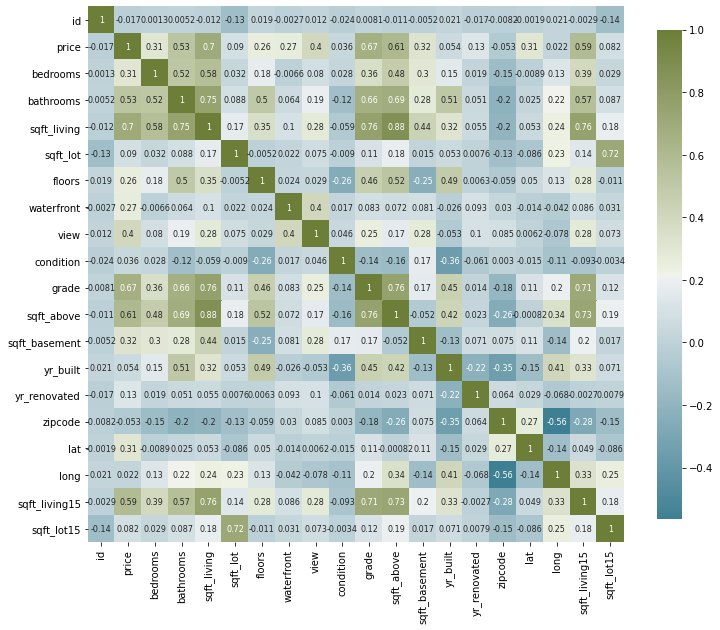

In [7]:
#2.1 this is a plot correlation map , it shows the correlation between each feature , if our target is the price of the house , then 
#our best feature to use would bet square footage of the home 'sqft_living' , grade and square footage of house apart from basement 'sqft_above'
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 100 , as_cmap = True )
    s = sns.heatmap(corr, cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,annot = True,annot_kws = { 'fontsize' : 8 })   

plot_correlation_map(data)


In [8]:
#3 splitting our dataset into a training set and a testing set. 
x=data["sqft_living"].values[:,np.newaxis]
y=data["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40) #splitting data with test size of 20%



In [9]:
#4 applying the linear regression to our model
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
#almost 1/2 of the output variation can be explained by the model's inputs but it's the regression line is still not perfect

MSE 62451720102.954
R squared 0.5035535751151091


In [10]:
model.coef_

array([282.4452088])

In [11]:
model.intercept_

-47399.245995821664

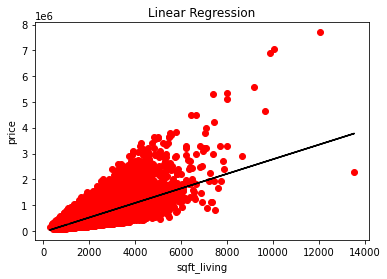

In [12]:
#5 plotting linear regression , the line equation is : y= 284.00261205*x - 50697.94107634993
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [13]:
#6 an additional feature we can use is the grade
#extract x and y from our data
x=data[["sqft_living","grade"]]  #we have more than one input
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 20%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

#we can interpret that the performance of our model got slightly better

MSE 57413775762.86427
R squared 0.5433112989852685


In [14]:
x=data[["sqft_living","grade"]]  #we have more than one input
y=data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))
#we can interpret that the performance of our model got slightly better 
#in conclusion the polynomial regression maximizes the betterment of model , 

MSE:  50395734921.664406
R squared:  0.5991351829373315


ValueError: x and y must be the same size

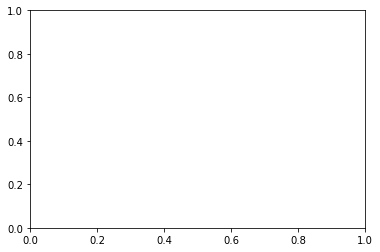

In [15]:
#plotting the polynomial regression degree 3
t=1000
x= data["sqft_living"].values.reshape(-1,1)
y= data["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
#poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 
x_test_poly=poly.fit_transform(x_test)

plt.scatter(x_poly, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(y_test, lg.predict(x_test_poly), color="k") 

MSE:  58253831853.43193
R squared:  0.5366292071060405


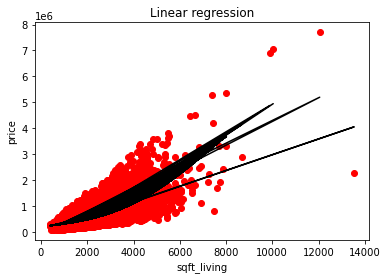

In [16]:
#plotting the polynomial regression degree 4
t=1000
x= (data.iloc[:])["sqft_living"].values.reshape(-1,1)
y= (data.iloc[:])["price"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
poly = PolynomialFeatures(degree = 4) 
x_test_poly = poly.fit_transform(x_test) 
x_train_poly = poly.fit_transform(x_train) 
poly.fit(x_train_poly,y_train) 
#poly.fit(x_test_poly,y_test)
lg=LinearRegression()
lg.fit(x_train_poly, y_train) 

plt.scatter(x_train, y_train, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x_train, lg.predict(x_train_poly), color="k") 
predicted = lg.predict(x_test_poly)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

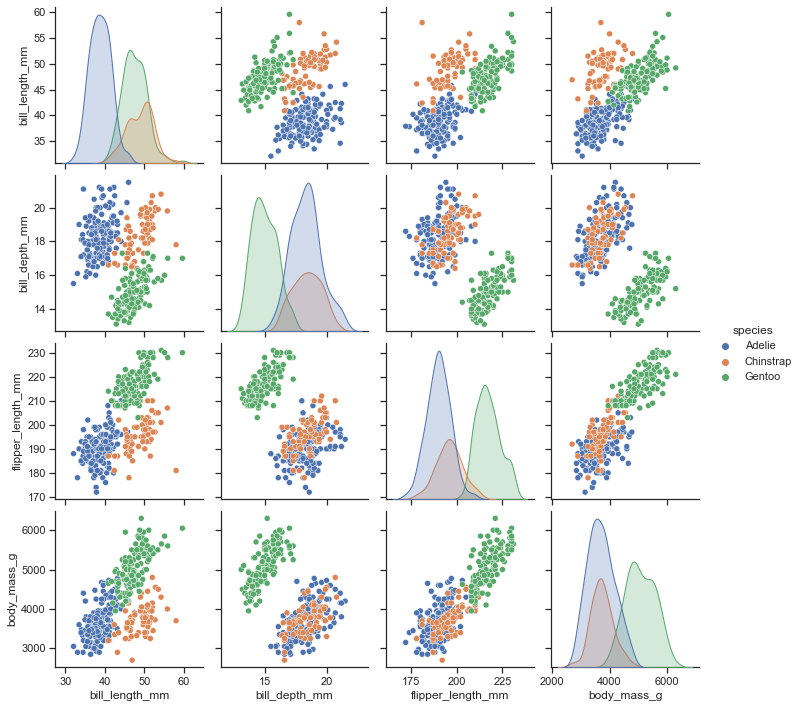

In [17]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

In [21]:
x=data['price'].values.reshape(-1, 1)
x
poly = PolynomialFeatures(degree = 2) 
x_=poly.fit_transform(x)
print("x before transformation: ", x)
print("x after transformation: ", x_)
lg.fit(x_, y) # Fitting Polynomial Regression to the dataset 

x before transformation:  [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
x after transformation:  [[1.00000000e+00 2.21900000e+05 4.92396100e+10]
 [1.00000000e+00 5.38000000e+05 2.89444000e+11]
 [1.00000000e+00 1.80000000e+05 3.24000000e+10]
 ...
 [1.00000000e+00 4.02101000e+05 1.61685214e+11]
 [1.00000000e+00 4.00000000e+05 1.60000000e+11]
 [1.00000000e+00 3.25000000e+05 1.05625000e+11]]


LinearRegression()

In [22]:
x_test=[[0.49, 0.18]]
x_test_=poly.fit_transform(x_test)
lg.predict(x_test_)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 6)